In [2]:
import pandas as pd
from total_data_import import import_data
from top50 import top50
import matplotlib.pyplot as plt

# Import the top 50 Raw lifters of all time by weight class and sex
df = top50()

# Create chart of average bodyweight, average total and heaviest total by weight class and sex
# Then calcualte the relative strength and absolute & relative strength percent growth figures
sex_strength_comparisons = (
    df.groupby(["weightclass_lbs", "sex"])
        .agg(
            avg_bodyweight_lbs=("bodyweight_lbs", "mean"), 
            avg_total_lbs=("total_lbs", "mean"), 
            heaviest_total=("total_lbs", "max")
        )
        .assign(
            strength_ratio=lambda x: (x["avg_total_lbs"] / x["avg_bodyweight_lbs"]), 
            absolute_strength_growth=lambda x: x.groupby("sex")["heaviest_total"].pct_change().mul(100), 
            relative_strength_growth=lambda x: x.groupby("sex")["strength_ratio"].pct_change().mul(100)
        )
        .round(2)
)

sex_strength_comparisons

avg_bodyweight_lbs  avg_total_lbs  heaviest_total  \
weightclass_lbs    sex                                                      
148                F                147.14        1209.06         1350.33   
                   M                145.88        1538.25         1700.00   
165                F                162.76        1245.77         1587.33   
                   M                168.47        1684.00         1876.13   
181                F                177.31        1238.78         1526.70   
                   M                181.33        1829.99         2018.33   
198                F                193.17        1262.34         1598.35   
                   M                205.67        1951.07         2254.22   
220                F                212.50        1228.12         1433.00   
                   M                221.17        2029.77         2300.52   
242                M                238.68        2091.47         2320.36   
275                M                269.48        2144.32         2336.90   
308                M                296.38        2189.89         2430.59   
Super Heavy Weight F                287.81        1415.11         1625.91   
                   M                356.47        2224.65         2485.71   

                        strength_ratio  absolute_strength_growth  \
weightclass_lbs    sex                                             
148                F              8.22                       NaN   
                   M             10.54                       NaN   
165                F              7.65                     17.55   
                   M             10.00                     10.36   
181                F              6.99                     -3.82   
                   M             10.09                      7.58   
198                F              6.53                      4.69   
                   M              9.49                     11.69   
220                F              5.78                    -10.35   
                   M              9.18                      2.05   
242                M              8.76                      0.86   
275                M              7.96                      0.71   
308                M              7.39                      4.01   
Super Heavy Weight F              4.92                     13.46   
                   M              6.24                      2.27   

                        relative_strength_growth  
weightclass_lbs    sex                            
148                F                         NaN  
                   M                         NaN  
165                F                       -6.86  
                   M                       -5.20  
181                F                       -8.72  
                   M                        0.96  
198                F                       -6.46  
                   M                       -6.00  
220                F                      -11.56  
                   M                       -3.26  
242                M                       -4.52  
275                M                       -9.19  
308                M                       -7.14  
Super Heavy Weight F                      -14.93  
                   M                      -15.54

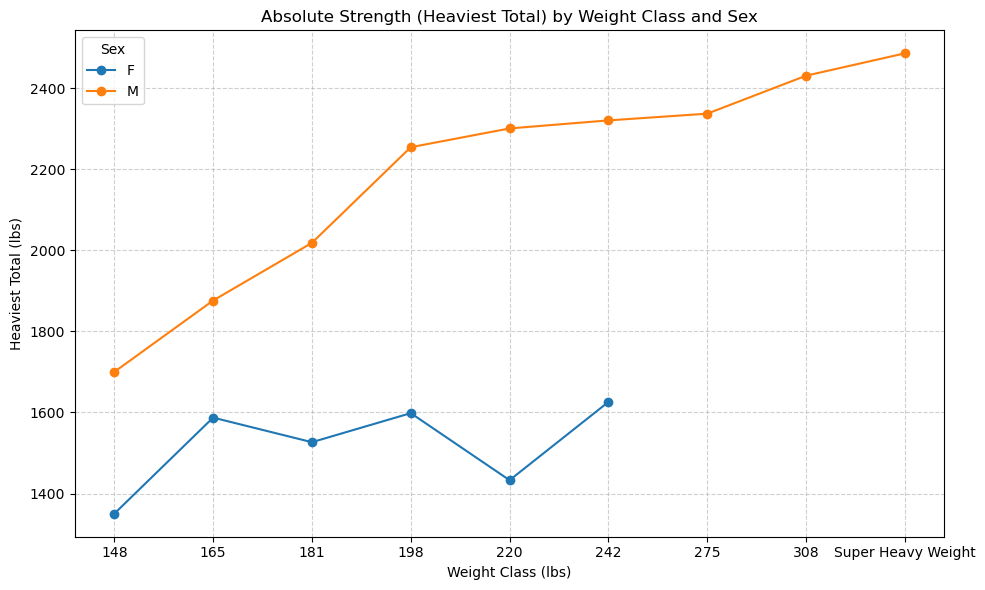

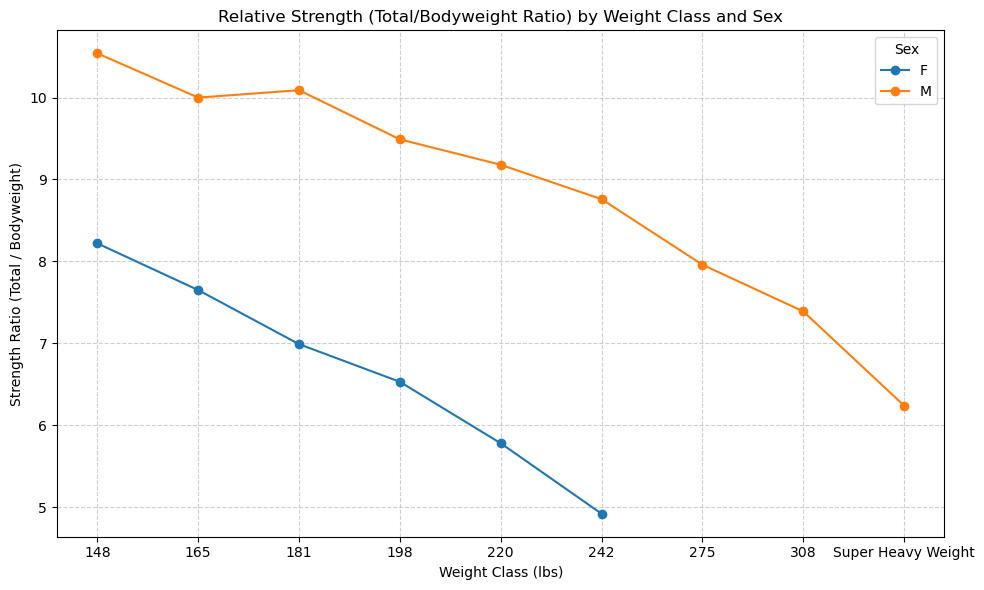

In [3]:
import matplotlib.pyplot as plt

# Reset index for plotting
plot_df = sex_strength_comparisons.reset_index()

# Helper: numeric sorting for weight classes
def weightclass_sort_key(wc: str):
    wc = str(wc).strip()
    if wc.lower().startswith("super"):
        return 9999
    try:
        return float(wc.replace("+", "").split()[0])
    except ValueError:
        return 9999

# Sort weight classes properly
plot_df = plot_df.sort_values("weightclass_lbs", key=lambda x: x.map(weightclass_sort_key))
ordered_labels = sorted(plot_df["weightclass_lbs"].unique(), key=weightclass_sort_key)

# Reusable plotting function
def plot_strength_metric(y_col, title, ylabel):
    plt.figure(figsize=(10,6))
    for sex, data in plot_df.groupby("sex"):
        data = data.sort_values("weightclass_lbs", key=lambda x: x.map(weightclass_sort_key))
        plt.plot(range(len(data)), data[y_col], marker='o', label=sex)
    plt.xticks(ticks=range(len(ordered_labels)), labels=ordered_labels)
    plt.title(title)
    plt.xlabel("Weight Class (lbs)")
    plt.ylabel(ylabel)
    plt.legend(title="Sex")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Absolute Strength (Heaviest Total)
plot_strength_metric(
    y_col="heaviest_total",
    title="Absolute Strength (Heaviest Total) by Weight Class and Sex",
    ylabel="Heaviest Total (lbs)"
)

# Relative Strength (Total-to-Bodyweight Ratio)
plot_strength_metric(
    y_col="strength_ratio",
    title="Relative Strength (Total/Bodyweight Ratio) by Weight Class and Sex",
    ylabel="Strength Ratio (Total / Bodyweight)"
)